# Визуализация текстовых данных


*Авторы: Галушко Илья, Мария Долгодворова, Трошин Даниил – НИУ ВШЭ*

## Простые визуализации. Библиотека Matplotlib.

Любой функции визуализации мы должны подать на вход некоторые данные (скажем, X и Y), зависимость между которыми мы хотим отразить. Начнём с обычных поточечных графиков (мы их уже видели на прошлых семинарах).

In [12]:
# !pip install matplotlib - если не установлено
import matplotlib.pyplot as plt

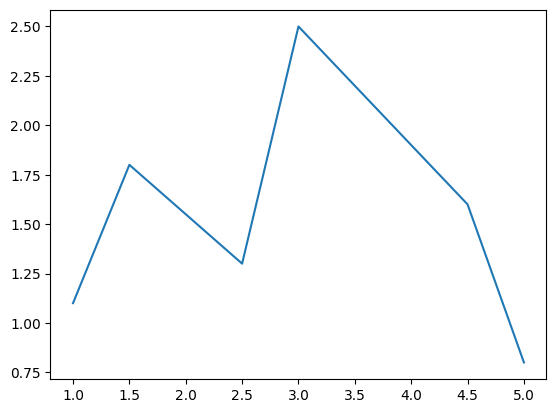

In [13]:
# X и Y - координаты точек
X = [1, 1.5, 2.5, 3, 4.5, 5]
Y = [1.1, 1.8, 1.3, 2.5, 1.6, 0.8]

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.show()

На самом деле любой график в Matplotlib будет строиться поточечно: чтобы построить непрерывный график, нам нужно будет просто выбрать достаточно мелкое разбиение.

**Задание**. Постройте график *y = x²*.

Можно также построить множество точек, тогда вместо метода `plot` выбираем `scatter`.

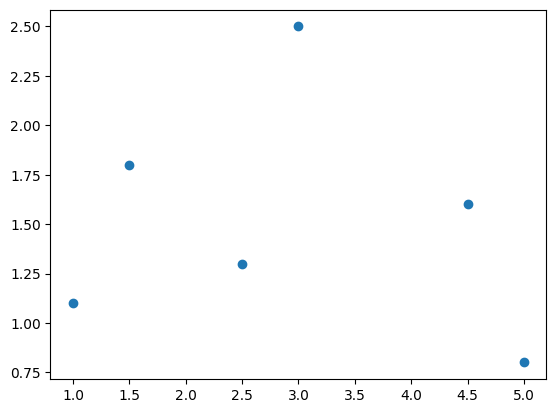

In [14]:
plt.scatter(X, Y)  # рисуем точки
plt.show()

Библиотека Matplotlib (как и другие библиотеки визуализации в Питоне) предоставляет множество средств оформления графиков в нужном нам стиле.

**Так, можно кастомизировать график, передав аргументы в `plt.scatter()`**:

* `s`: размер точки, по умолчанию 20
* `c`: цвет точки, по умолчанию  `'b'` (blue)
* `marker`: символ точки, по умолчанию `'o'` (circle)

Вот некоторые наиболее популярные:


**Для точек:**

| Marker | Notation |
| --- | --- |
| Point | `.` |
| Circle | `o` |
| Triangle Down | `v` |
| Triangle Up | `^` |
| Triangle Left | `<` |
| Triangle Right | `>` |
| Octagon | `8` |
| Square | `s` |
| Pentagon | `p` |
| Plus (filled) | `P` |
| Diamond | `D` |
| Hexagon | `h` |

**Для задания цвета:**

| Color | Short Notation | Long Notation |
| --- | --- | --- |
| Blue | `b` | `blue` |
| Green | `g` | `green` |
| Red | `r` | `red` |
| Cyan | `c` | `cyan` |
| Magenta | `m` | `magenta` |
| Yellow | `y` | `yellow` |
| Black | `k` | `black` |
| White | `w` | `white` |

- Все стандартные цвета можно посмотреть[здесь](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- Есть еще более ["экзотические" цвета](https://xkcd.com/color/rgb/)
- Все маркеры можно найти [здесь](https://matplotlib.org/2.0.2/examples/lines_bars_and_markers/marker_reference.html)

В качестве размера и цвета можно задавать массивы с соответствующими значениями:

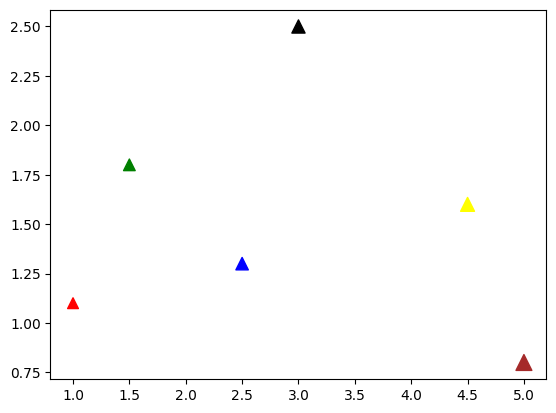

In [15]:
size = [60, 70, 80, 90, 100, 130]
colors = ['red', 'green', 'blue', 'black', 'yellow', 'brown']
plt.scatter(X, Y, s=size, c=colors, marker='^')
plt.show()

А также мы можем подписать оси, точки и дать название графику:

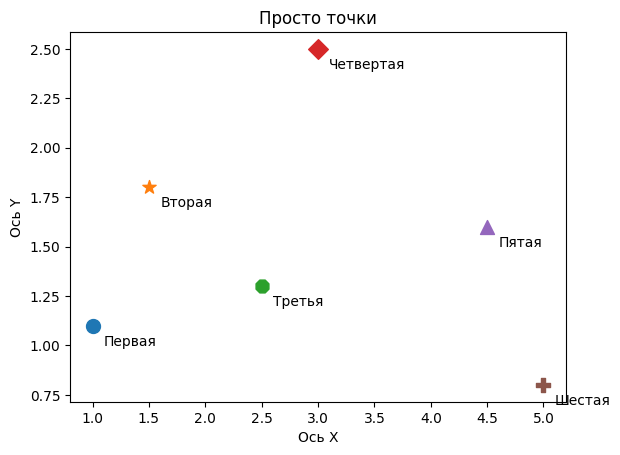

In [16]:
markers = ['o', '*', '8', 'D', '^', 'P'] # список маркеров
dots = ['Первая', "Вторая", "Третья", "Четвертая", "Пятая", "Шестая"] # подписи

for x, y, m, d in zip(X, Y, markers, dots):
    plt.scatter(x, y, marker=m, s=100)
    # ±0.1 - это чтобы текст не наползал на маркер, а отрисовывался чуть ниже и правее
    plt.text(x+0.1, y-0.1, d)
plt.title("Просто точки")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

А теперь попробуем построить график на реальных данных. В библиотеке sklearn есть несколько классических датасетов, которые можно загрузить и исследовать. Один из них – *iris*, содержит статистику по цветам ирисам.

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

# скачиваем датасет iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


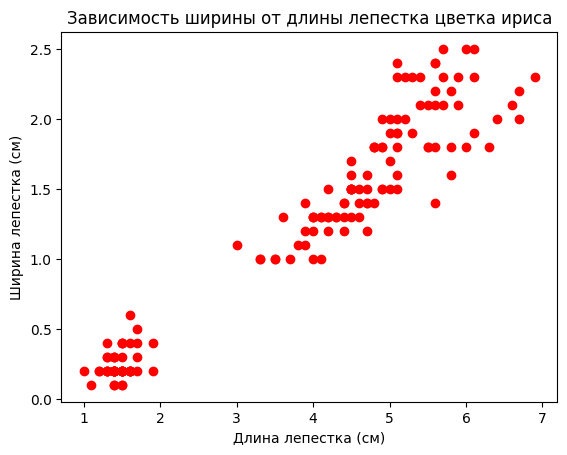

In [18]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c='red')
plt.title('Зависимость ширины от длины лепестка цветка ириса')
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.show()

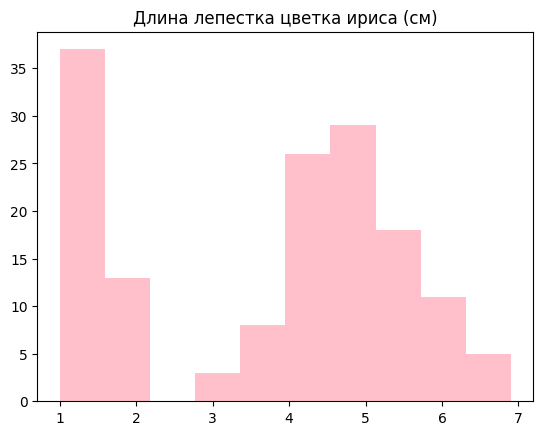

In [19]:
plt.hist(df['petal length (cm)'], color='pink') # для гистограммы параметр цвета будет не `c`, а `color` - надо смотреть документацию для каждой функции
plt.title('Длина лепестка цветка ириса (см)')
plt.show()

Про другие существующие виды визуализаций можно прочитать в [документации Matplotlib](https://matplotlib.org/stable/).

## Библиотека Seaborn

Seaborn – библиотека на основе Matplotlib, предоставляющая высокоуровневый интерфейс для визуализации.

## Dataset

Для демонстрации используется датасет Women's E-Commerce Clothing Reviews: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

Этот набор данных включает 23 486 строк и 10 признаков. Каждая строка соответствует отзыву клиента и включает переменные:

* <b>Clothing ID:</b> Integer Categorical variable that refers to the specific piece being reviewed.
* <b>Age:</b> Positive Integer variable of the reviewers age.
* <b>Title:</b> String variable for the title of the review.
* <b>Review Text:</b> String variable for the review body.
* <b>Rating:</b> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* <b>Recommended IND:</b> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* <b>Positive Feedback Count:</b> Positive Integer documenting the number of other customers who found this review positive.
* <b>Division Name:</b> Categorical name of the product high level division.
* <b>Department Name:</b> Categorical name of the product department name.
* <b>Class Name:</b> Categorical name of the product class name.

## Загружаем нужные библиотеки

In [20]:
!pip install seaborn
!pip install textblob

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Загружаем и обрабатываем датасет

In [22]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Удаляем все лишние колонки

In [23]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [24]:
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

,0
Clothing ID,0
Age,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0
Class Name,0


## Обрабатываем данные

In [25]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

В данном случае используется библиотека TextBlob для определения сентимента (степень принадлежности отзыва к одной из оценочных характристик: положительно, нейтрально, негативно).

In [26]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))

## Посмотрим на примеры текстов и их оценок

### Polarity == 1

In [27]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

This is a perfect jacket over any shirt, tee, or dress. jacket is well made and goes with anything!
Loved this dress and was even happier to learn i could order it in petite!!
Well made & lined. great find for the fall!
This cover-up is perfect for the beach or the pool. it is see through.
This is a wonderful style.


### Polarity == 0

In [28]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Flattering poncho, pair well with leggings or skinny jeans and booties
So thin and see thru it's not even wearable in public. extremely cheap and ill fitting for any price let alone this price. i feel like they will rip the moment i wear them out. going back.
I'm 5'3 and ordered the small. as soon as i saw it in person, i knew it was an item to return. the material is too transparent, and designed to wear with undergarments or swim gear that you want people to see. it was way too long for me. i think it would work for a taller person. i just didn't feel it was worth the money for the quality and transparency.
My daughter loves these, she wears them around the house all day when she doesn't have to go out.
I bought these for a trip to the caribbean. i sweat a lot. if you have ever been humiliated by having a ring of sweat around your crotch area, then i do not recommend these shorts in the moss color. this color and fabric do not camouflage sweat. i will spare you the photos.


### Polarity <= -0.7

In [29]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
Cut out design, no seems or hems.
 very disappointed in retailer
Awful color, horribly wrinkled and just a mess...so disappointed
What a disappointment and for the price, it's outrageous!


## Распределение текстов по сентименту, возрасту автора, длине отзыва



Строим гистограмму уже с помощью функции `distplot` из библиотеки `seaborn`. Можно сравнить её с `plt.hist`.

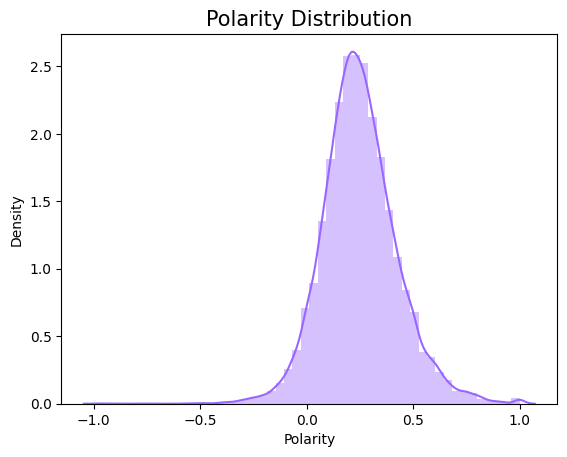

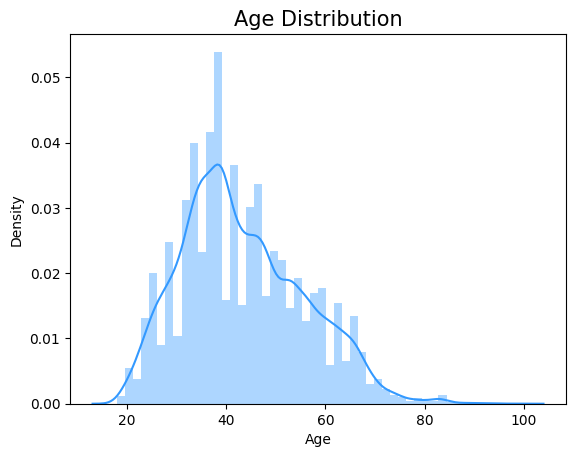

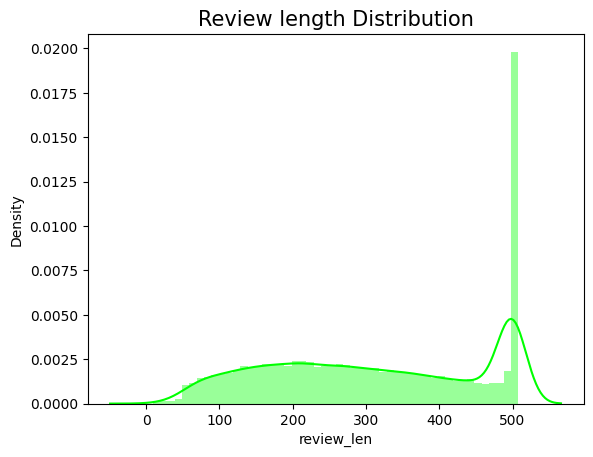

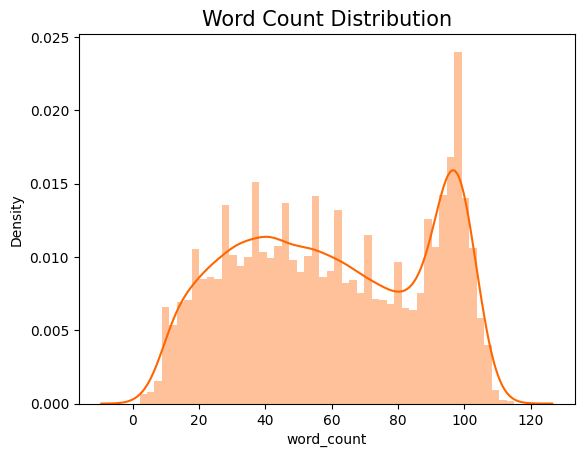

In [30]:
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600'] # цвета можно передавать RGB-кодами

for feature, title, color in zip(features, titles, colors):
    #plt.hist(x=df[feature], bins=50, color=color)
    sns.distplot(x=df[feature], bins=50, color=color)
    # bins - параметр, определяющий величину разбиения, можете поменять его и посмотреть, что изменится
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

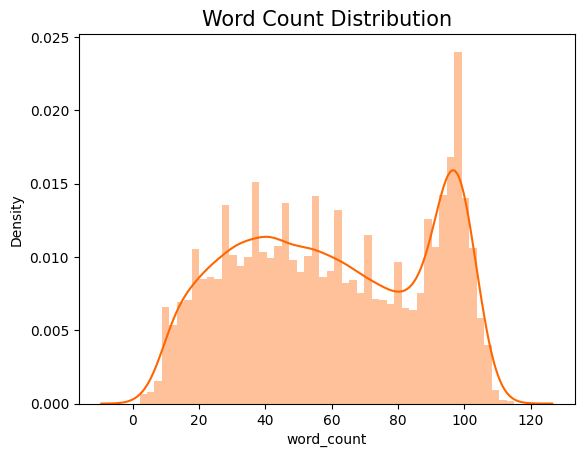

In [31]:
sns.distplot(x=df[feature], bins=50, color=color)
plt.title(title, size=15)
plt.xlabel(feature)
plt.show()

## Распределение текстов по рейтингу клиентов


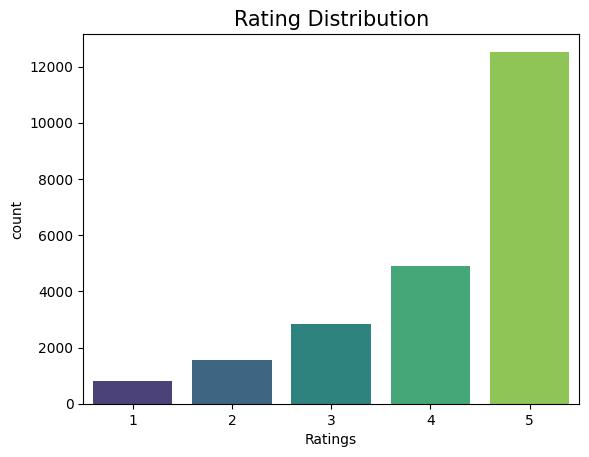

In [32]:
sns.countplot(x = 'Rating', palette='viridis', data=df) # с помощью параметра palette можно задать палитру цветов
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

**Рейтинги соответствуют показателю полярности, то есть большинство рейтингов довольно высоки и составляют 4 или 5 диапазонов. Мы видим явный уклон отзывов в сторону высоких оценок.**

## Распределение по дивизионам

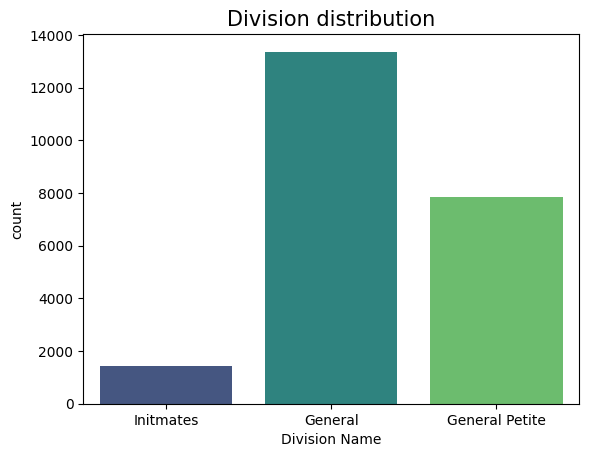

In [33]:
sns.countplot(x='Division Name', palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

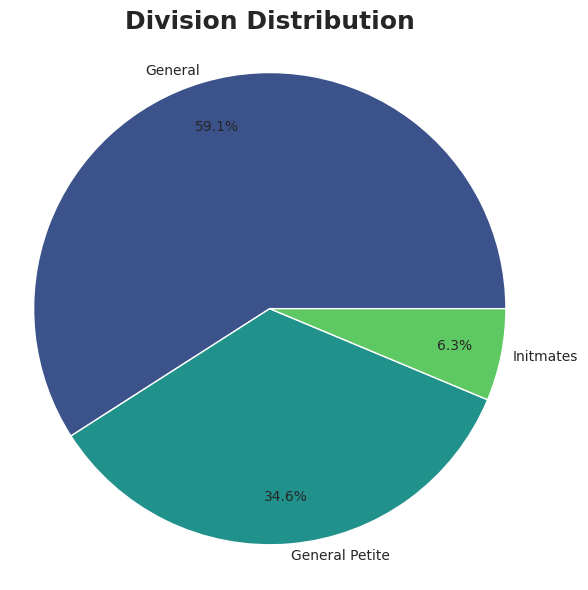

In [66]:
plt.figure(figsize=(6, 6))

counts = df["Division Name"].value_counts()  # количество компаний по столбцу Sector
plt.pie(
    counts,
    labels=counts.index,  # метки на диаграмме
    autopct="%1.1f%%",  # отображение процентов
    colors=sns.color_palette("viridis", len(counts)),  # задаем красивые цвета
    pctdistance=0.8,  # расстояние меток-процентов от центра круга
    labeldistance=1.05,
)

plt.title("Division Distribution", fontsize=18, fontweight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Распределение по департаментам

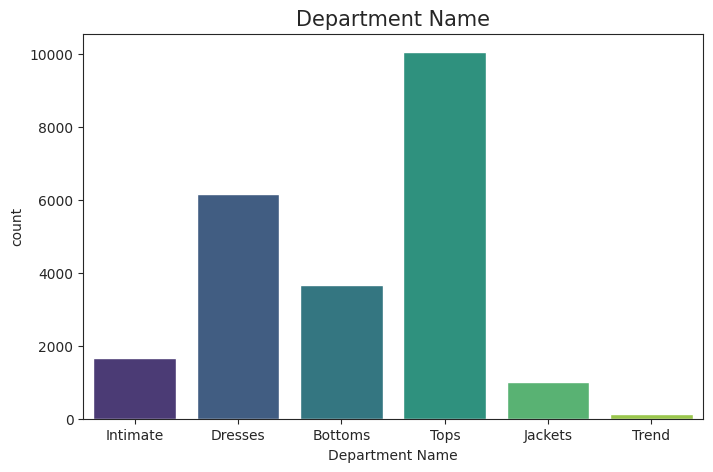

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Department Name', size=15)
plt.show()

## Распределение по классам

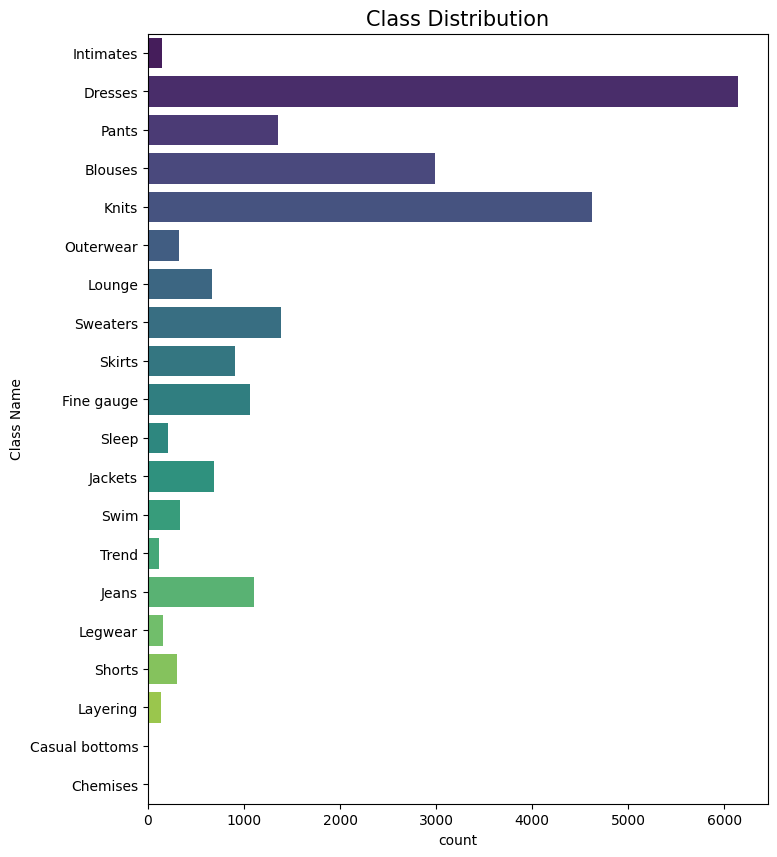

In [35]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df)
plt.title('Class Distribution', size=15)
plt.show()

## Униграммы, биграммы, триграммы



In [36]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [37]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

In [38]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

## Unigrams Distribution

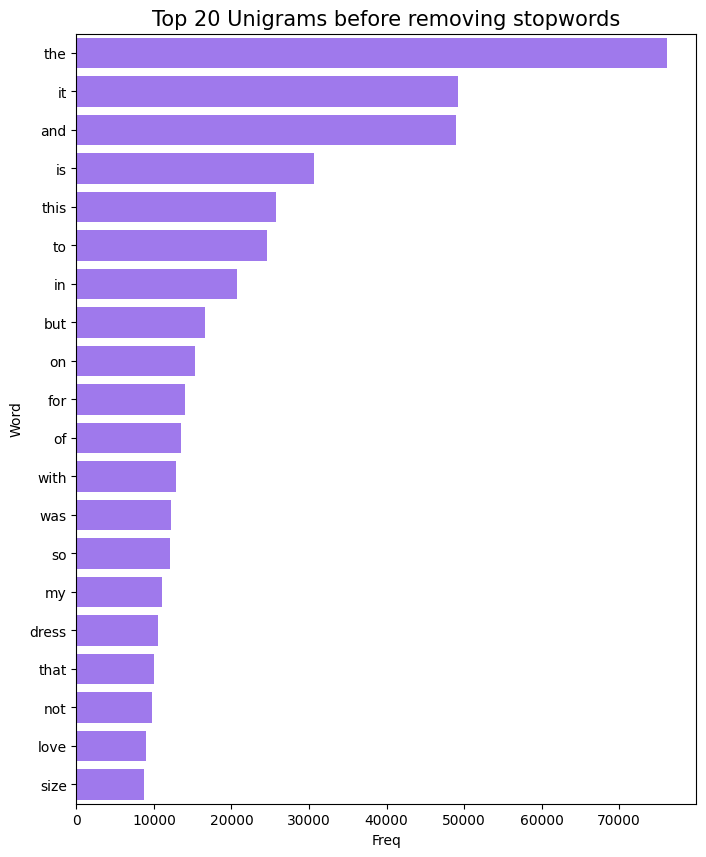

In [39]:
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']


plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

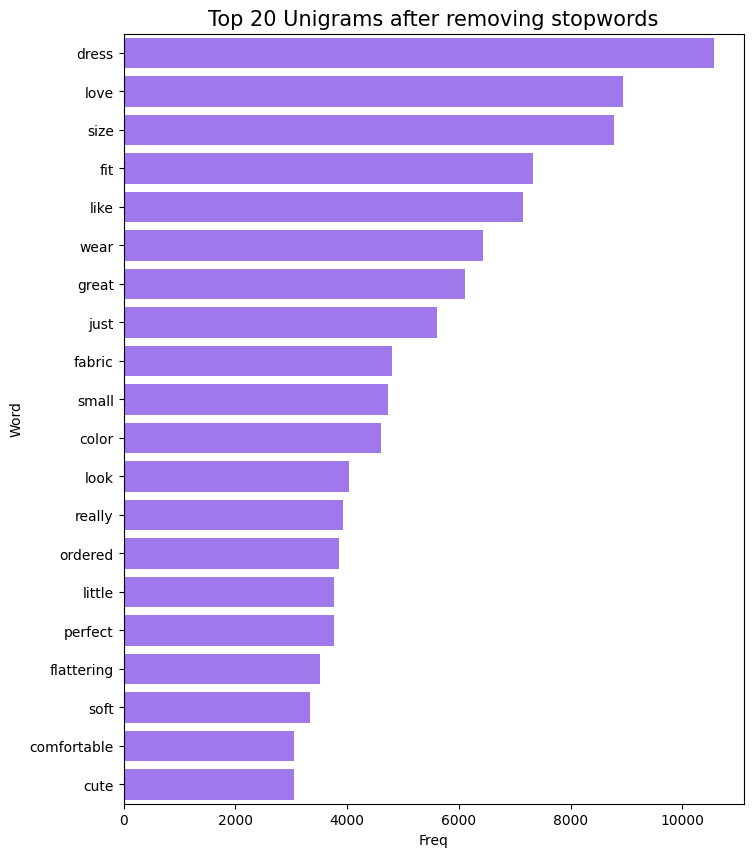

In [40]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Bigrams Distribution

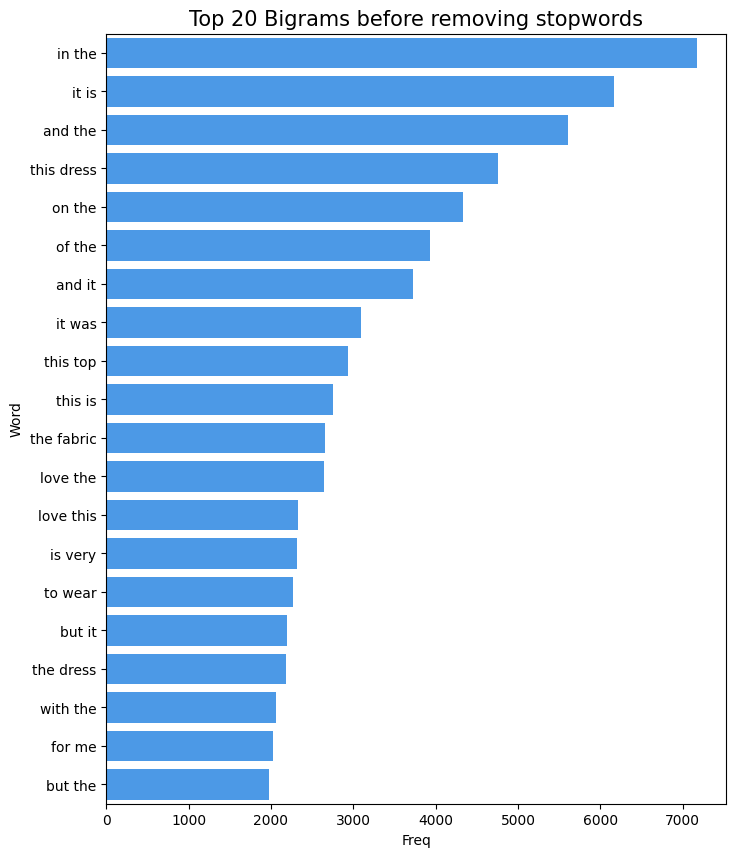

In [41]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

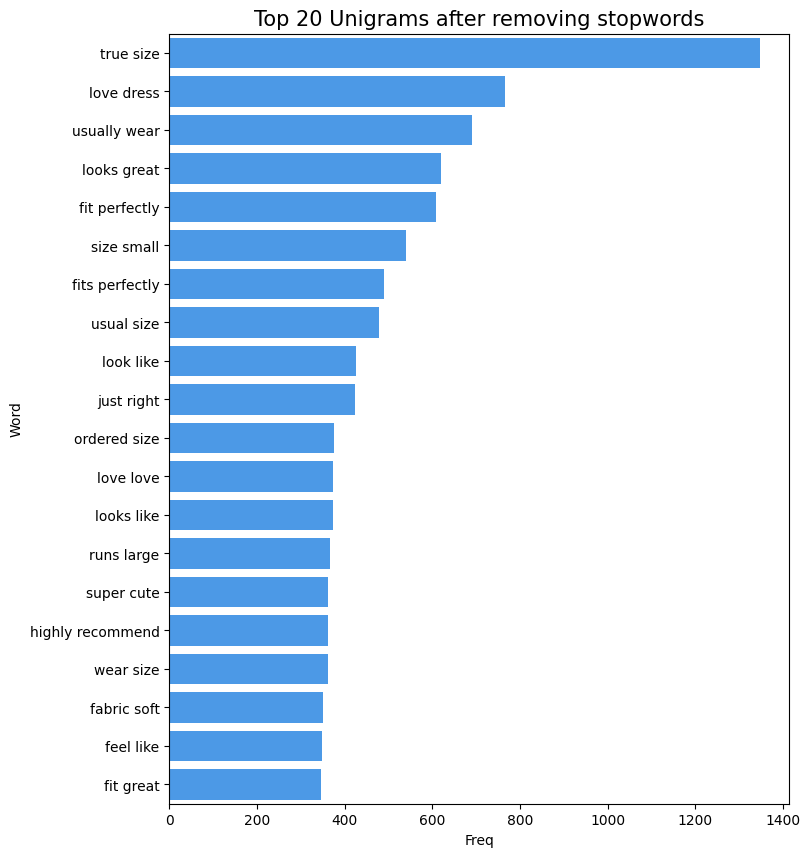

In [42]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Trigrams Distribution

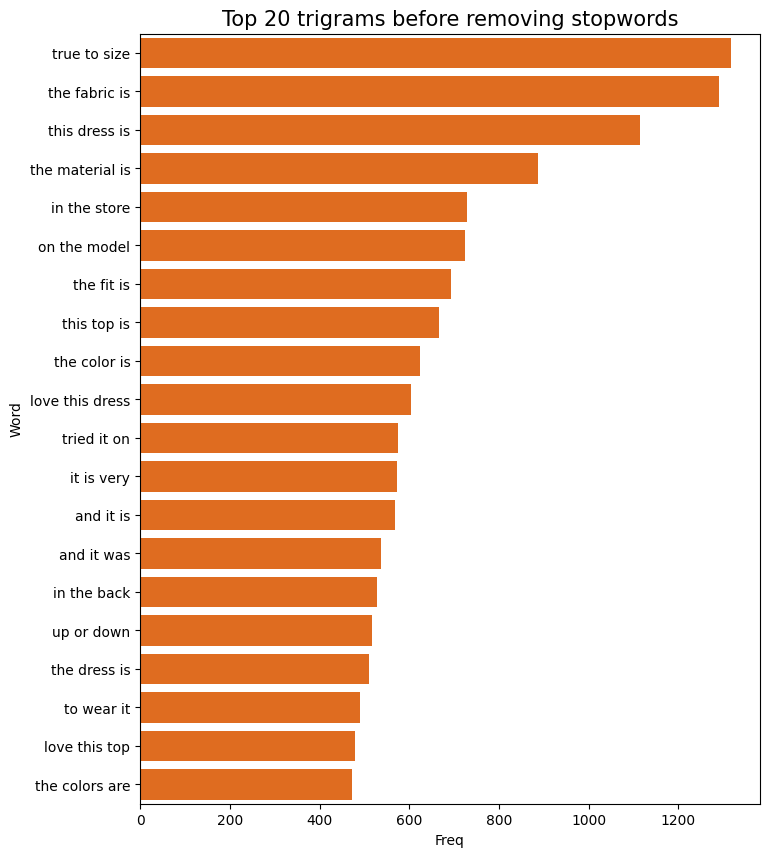

In [43]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

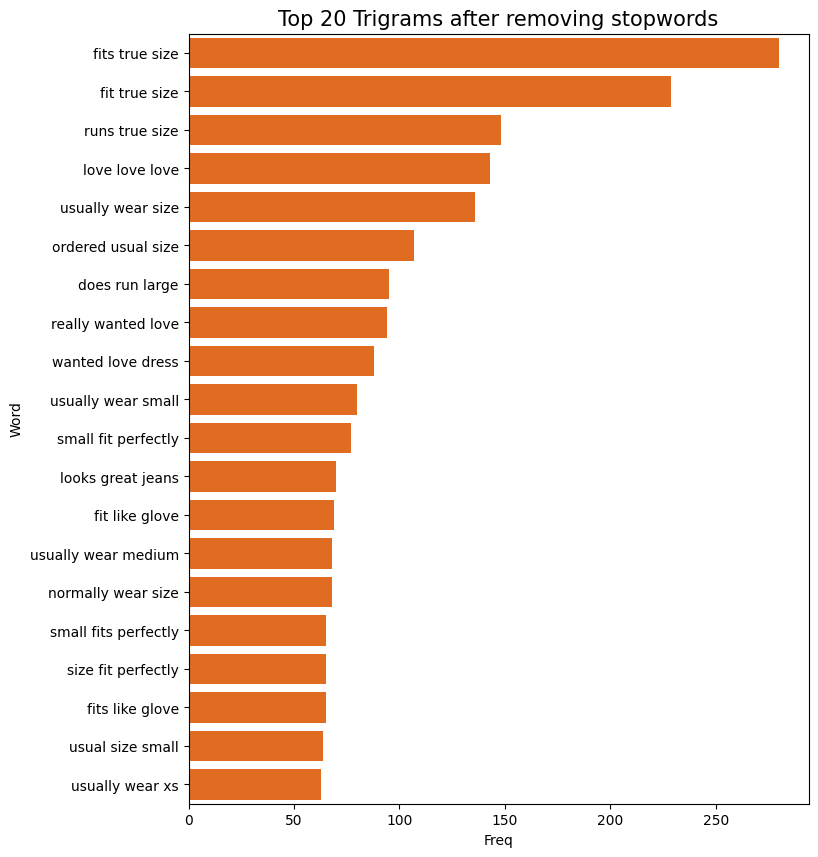

In [44]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

**Удаление стоп-слов позволяет существенно повысить читаемость статистики по биграммам и триграммам**

## Department name v/s Sentiment Polarity

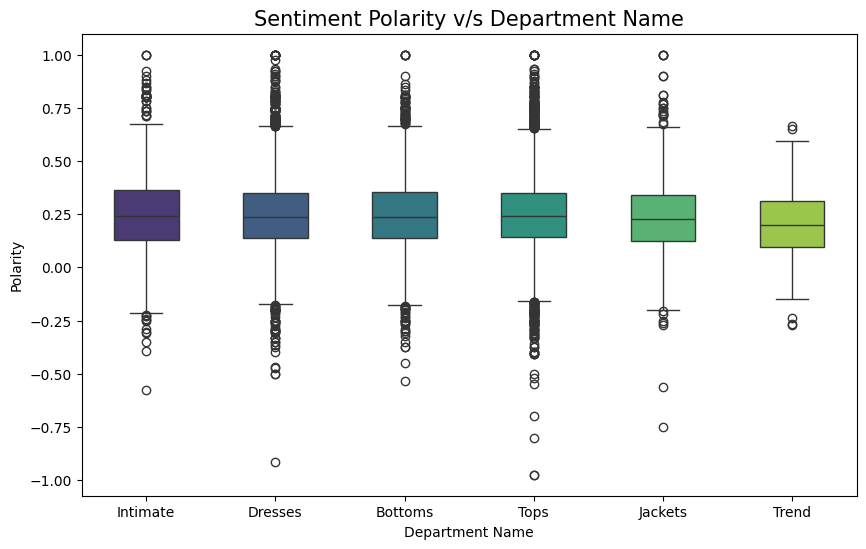

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

## Departments Name v/s Rating

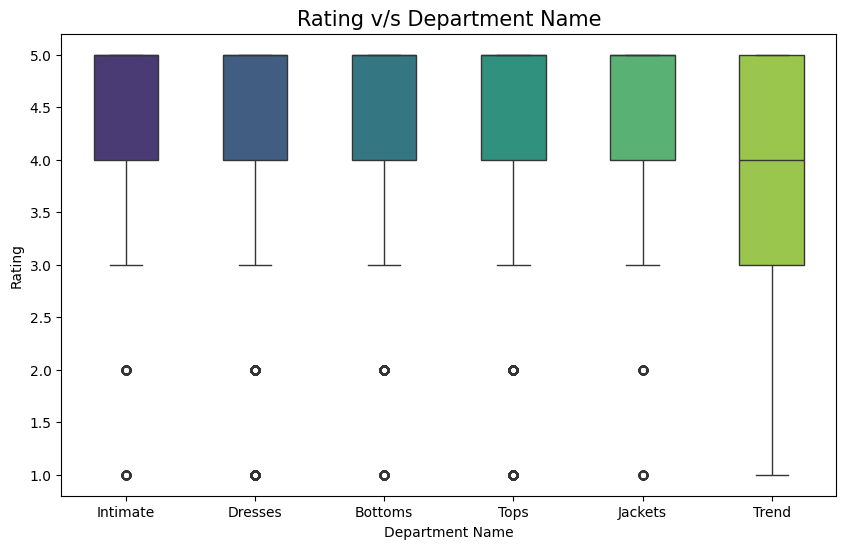

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

За исключением отдела «Тренд», средний рейтинг всех остальных отделов составил 5. В целом в этом наборе данных обзора рейтинги высокие, а настроения положительные.

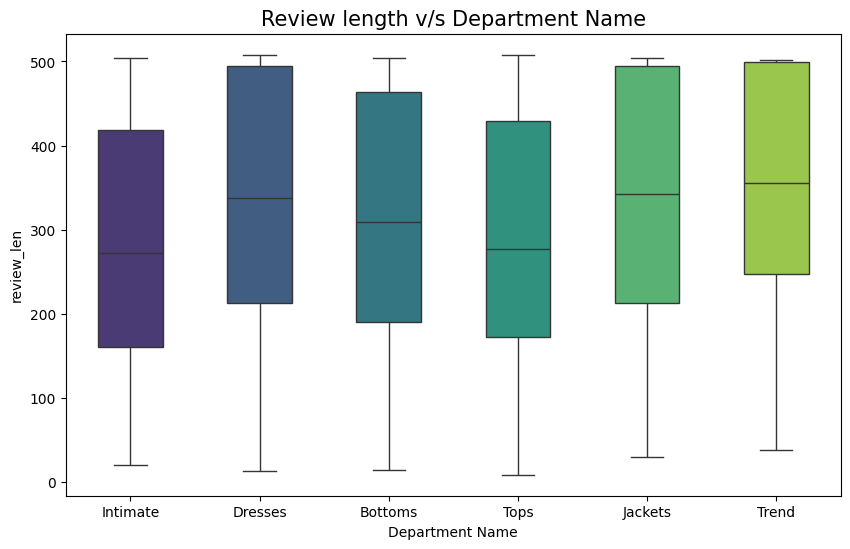

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='review_len', width=0.5, palette='viridis', data=df)
plt.title('Review length v/s Department Name', size=15)
plt.show()

Средняя длина обзора в отделах «Топс» относительно ниже, чем в других отделах.

## Распределение сентимента по метке рекомендации

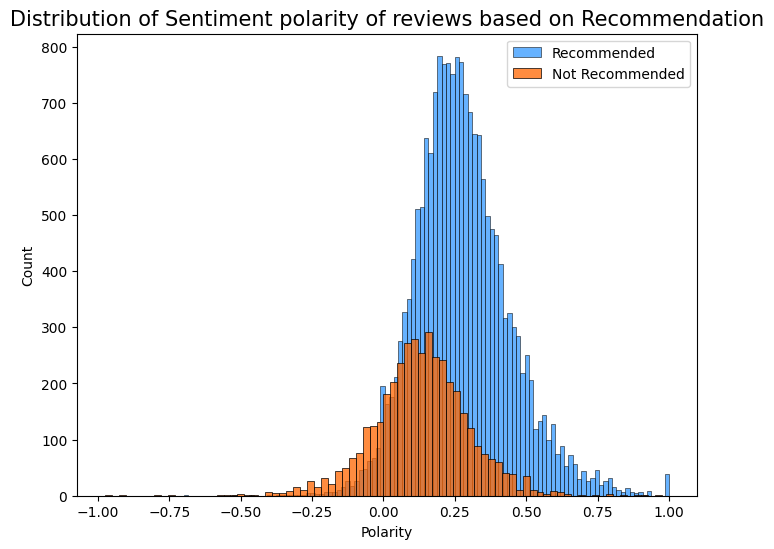

In [48]:
recommended = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], label='Recommended')
sns.histplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Распределение рейтинга по метке рекомендации

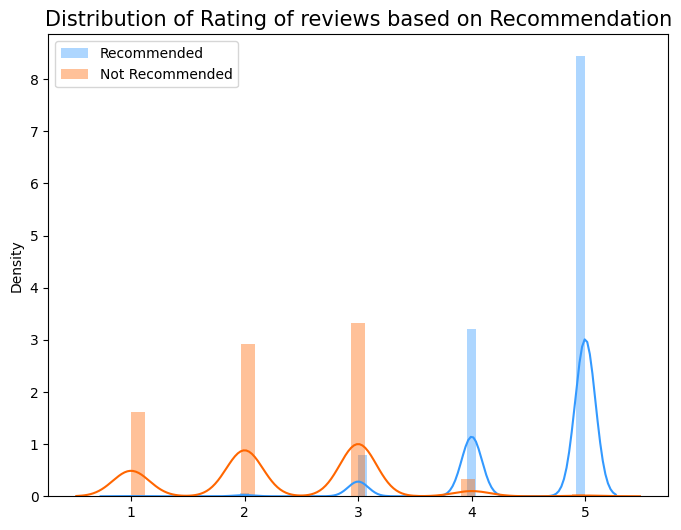

In [49]:
recommended = df.loc[df['Recommended IND'] == 1, 'Rating']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Rating']

plt.figure(figsize=(8, 6))
sns.distplot(x=recommended, color=colors[1], label='Recommended', )
sns.distplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Rating of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Распределение длины отзыва по метке рекомендации

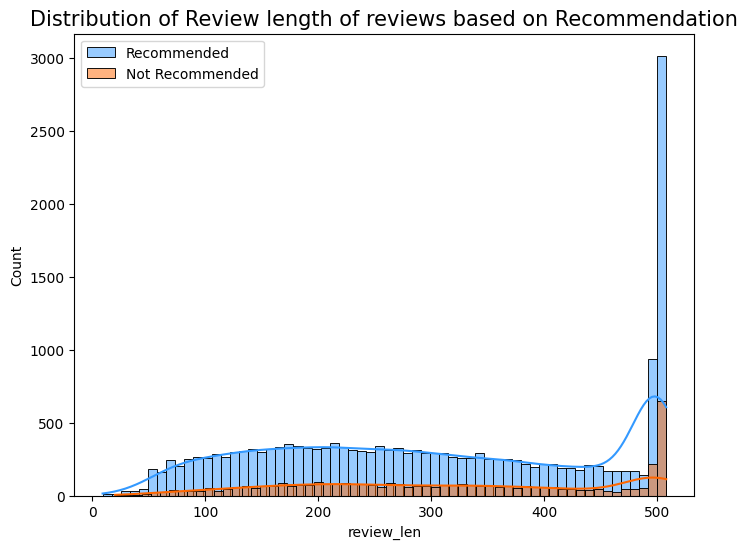

In [50]:
recommended = df.loc[df['Recommended IND'] == 1, 'review_len']
not_recommended = df.loc[df['Recommended IND'] == 0, 'review_len']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], kde=True, label='Recommended', binwidth=8)
sns.histplot(x=not_recommended, color=colors[3], kde=True, label='Not Recommended', binwidth=8)
plt.title('Distribution of Review length of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Использование LLM для определения сентимента текста на руссском языке

Давайте попробуем взять отзывыв из датасета Yandex: Geo Reviews и подобрать к ним метку сентимента с помощью классической LLM - Bert.

In [51]:
!pip install -q transformers

In [ ]:
import pandas as pd

df = pd.read_csv(r'.../Webinar/geo-reviews-dataset-2023.csv')
df = df.iloc[:1000,:]
df.head()

# Импорт модели и её применение

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast


print(len(df))

tokenizer = BertTokenizerFast.from_pretrained('seara/rubert-tiny2-russian-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('seara/rubert-tiny2-russian-sentiment', return_dict=True)

def predict(text):
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(predicted, dim=1).numpy()
    return predicted





df['sentiment'] = df['text'].apply(predict)

In [ ]:
df.head()

## Посмотрим на примеры отзывов


### Sentiment == 1

In [ ]:
cl = df.loc[df.sentiment == 1, ['text']].sample(5).values
for c in cl:
    print(c[0])

### Sentiment == 0

In [ ]:
cl = df.loc[df.sentiment == 0, ['text']].sample(5).values
for c in cl:
    print(c[0])

### Sentiment == 2

In [ ]:
cl = df.loc[df.sentiment == 2, ['text']].sample(5).values
for c in cl:
    print(c[0])

## Альтернативный вариант пайплайна

In [ ]:
!pip install -q transformers

In [ ]:
import pandas as pd


df = pd.read_csv(r'.../Webinar/geo-reviews-dataset-2023.csv')
df = df.iloc[:1000,:]
df.head()

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline(model='seara/rubert-tiny2-russian-sentiment', max_length=512, truncation=True)
data = list(df['text'])
sentiment_pipeline(data)

## Библиотека Scattertext

Крайне полезная библиотека для анализа больших текстовых коллекций. С её помощью вы сможете проанализировать распределение слов коллекции в границах двух ранговых характеристик. Здесь мы как раз посмотрим на такое распределение слов между категориями 'Low Rating' и 'High Rating'. Нам будет интересно узнать, какие слова наиболее часто встречаются в текстах соотвутствующих категорий. Большим преимуществом библиотеки является возможность просмотра примеров использования различных слов в разрезе изучаемых категорий.

In [ ]:
!pip install -U pip setuptools wheel
!pip install scattertext

In [ ]:
import spacy
spacy.load('ru_core_news_sm')

In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'.../Webinar/geo-reviews-dataset-2023.csv')
df = df.iloc[:10000,:]
df.head()


stop_words = stopwords.words('russian')
stopwordsandpunct = stop_words + list(string.punctuation)

df['Review_text'] = df['text'].apply(lambda w:' '.join(w for w in w.split() if w not in stopwordsandpunct))
df['Review_text'] = df['Review_text'].str.lower()
df['Review_text']
df.head()

In [ ]:
import nltk
from nltk import word_tokenize
tokenizer = nltk.tokenize.WhitespaceTokenizer()
def tokenize(text):
    return tokenizer.tokenize(text)

df['Review_text'] = df['Review_text'].apply(tokenize)


# converting token lists to strings using join() on each row or the OriginalTweet column
import warnings
warnings.filterwarnings("ignore")
df['Review_text'] = df.loc[:, 'Review_text'].apply(lambda x: ', '.join(x))
df.head()




In [ ]:
# Parsing OriginalTweet column with SpaCy's pipeline
import warnings


import spacy
nlp = spacy.load('ru_core_news_sm')
def parsetexts(text):
    text = text
    parsedtext = nlp(text)
    return parsedtext


df['parsed'] = df.loc[:,'Review_text'].apply(parsetexts)
df.head()

In [ ]:
df['rating'] = df['rating'].replace(
               {1:'Low Rating', 2:'Low Rating', 3:'Low Rating',
                4:'High Rating', 5:'High Rating'})

df.head()

In [ ]:
#Now plotting the scatterplot using scattertext
import scattertext as st
from IPython.display import IFrame, display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

corpus = st.CorpusFromParsedDocuments(df, category_col ='rating', parsed_col='parsed').build()
html = st.produce_scattertext_explorer(corpus, category = 'Low Rating', category_name='Low Rating',
                                      not_category_name='High Rating', minimum_term_frequency=10,
                                      width_in_pixels=1000, transform = st.Scalers.log_scale_standardize)
file_name = 'scattertextdemo_plot.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1000, height = 800)

## K-means для текстовых данных

In [ ]:
!pip install wordcloud


In [ ]:
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics



vectorizer = TfidfVectorizer(encoding='koi8r', stop_words=stopWords, min_df=2)
X = vectorizer.fit_transform(df.text)

In [ ]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=1000)
km.fit(X)


In [ ]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names_out()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def frequencies_dict(cluster_index):
    if cluster_index > 10 - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies


def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


for i in range(10):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

## Дополнительные материалы

- [Использование визуализации данных в исследованиях (Яндекс)](https://education.yandex.ru/handbook/data-analysis/article/ispolzovanie-vizualizacii-dannyh-v-issledovaniyah)
- [Практика (Яндекс)](https://education.yandex.ru/handbook/data-analysis/article/sozdanie-vizualizacij-v-python)
- [Типология визуализаций (Яндекс)](https://education.yandex.ru/handbook/data-analysis/article/tipologiya-vizualizacij)
- [Гайд от центра непрерывного образования ФКН НИУ ВШЭ](https://teletype.in/@cshsedpo/lB2lAhJxQIz)